## About Encyclopaedia Britannica - Seventh Edition

Data format: digitised text

Data creation process: Optical Character Recognition (OCR)

Data source: https://data.nls.uk/

## Import

In [92]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
conda install -c anaconda nltk

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [94]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [95]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import json

[nltk_data] Downloading package punkt to /Users/hekeren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hekeren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hekeren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hekeren/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Describe

In order to prevent the same results as the other panelists' data, I chose the seventh edition of the Encyclopaedia Britannica as my primary data object.

In [96]:
# Read the Encyclopedia Britannica CSV index file
encyclopaedia = pd.read_csv("encyclopaediaBritannica-inventory.csv", header=None)
encyclopaedia.columns = ['file','volume']
#print the seventh edition of encyclopaedia
#not include general index of seventh edition
sevenths = encyclopaedia[151:172]
#reset index
sevenths = sevenths.reset_index(drop=True)
#print sevenths
sevenths

,file,volume
0,192984258.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
1,192984259.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
2,193057500.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
3,193108322.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
4,193696083.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
5,193322690.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
6,193819043.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
7,193322688.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
8,193696084.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."
9,193469090.txt,"Encyclopaedia Britannica - Seventh edition, Vo..."


In [97]:
#Loading multiple files
#https://blog.csdn.net/TinyJian/article/details/79110495?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163653216016780264074306%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=163653216016780264074306&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-79110495.first_rank_v2_pc_rank_v29&utm_term=PlaintextCorpusReader%28&spm=1018.2226.3001.4187
seventh_folder = 'Seventh/'
wordlist = PlaintextCorpusReader(seventh_folder, '\d.*', encoding='latin1')
seventh_tokens = wordlist.words()
# prints the first 10 tokens
print(seventh_tokens[:10])

['*', 'r', 'it', '*', 'ENCYCLOPAEDIA', 'BRITANNICA', 'SEVENTH', 'EDITION', '.', 'THE']


In [98]:
#different number of words in different file
words = []
for index, row in sevenths.iterrows():
    f = open('Seventh/' + row['file'], 'r', encoding="utf8")
    content = f.read()    
    words.append(len(content.split()))
    f.close()
    
seventh_file = sevenths.assign(words=words)
seventh_file

,file,volume,words
0,192984258.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",865138
1,192984259.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1045066
2,193057500.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1016607
3,193108322.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1036758
4,193696083.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1037843
5,193322690.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1028323
6,193819043.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",999415
7,193322688.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1041219
8,193696084.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1004841
9,193469090.txt,"Encyclopaedia Britannica - Seventh edition, Vo...",1041829


In [99]:
#Basic information about the data
seventh_file.describe()

,words
count,2.100000e+01
mean,1.044053e+06
std,8.444387e+04
min,8.651380e+05
25%,1.016607e+06
50%,1.036758e+06
75%,1.073668e+06
max,1.335173e+06


/Users/hekeren/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


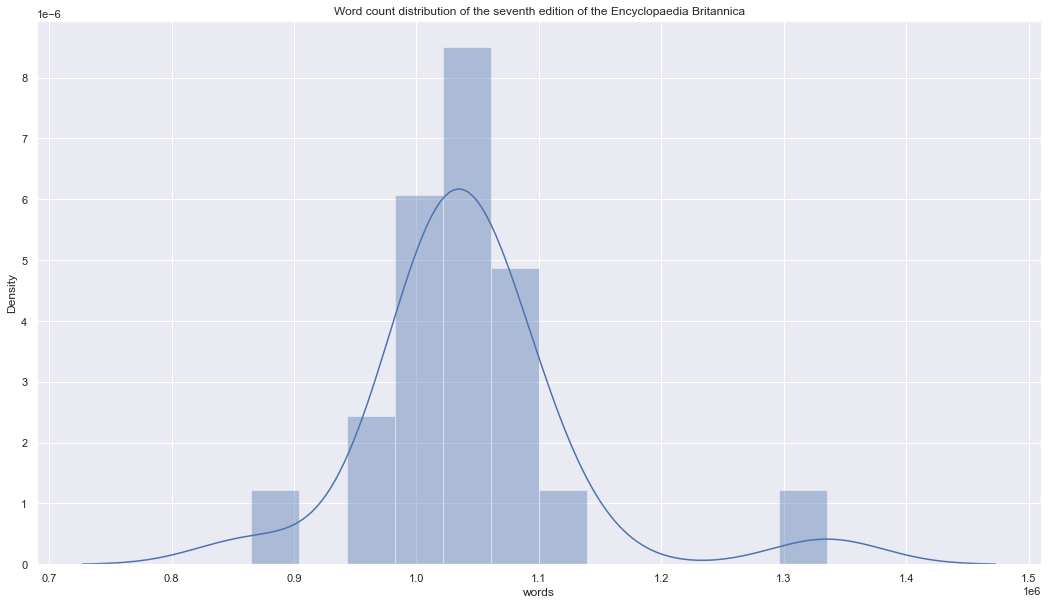

In [100]:
#word count distribution
plt.figure(figsize=(18,10))
num_chart = sns.distplot(seventh_file['words'])
num_chart.set_title('Word count distribution of the seventh edition of the Encyclopaedia Britannica')
plt.show()

In [101]:
#tokens number & files number & sentences number
num_tokens = 0
num_files = 0
num_sentences = 0
for filename in wordlist.fileids():
    num_tokens += len(wordlist.words(filename))
    num_files += 1
    num_sentences += len(wordlist.sents(filename))

print('Files Number:', num_files)
print('Sentences Number:', num_sentences)
print('Tokens Number:', num_tokens)

Files Number: 21
Sentences Number: 940701
Tokens Number: 26640224
